In [10]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [11]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [12]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [13]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [14]:
import yfinance as yf
tesla_data = yf.download('TSLA')
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)
html_data = response.content

soup = BeautifulSoup(html_data, "html5lib")

table = soup.find('table')

data = []
for row in table.find_all('tr')[1:]: # Skip the header row
    cols = row.find_all('td')
    data.append([col.text.strip().replace(',', '').replace('$', '') for col in cols])

tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

print(tesla_revenue.head())

   Date Revenue
0  2021   53823
1  2020   31536
2  2019   24578
3  2018   21461
4  2017   11759


In [16]:
import yfinance as yf
gme_data = yf.download('GME')
gme_data.reset_index(inplace=True)
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open    Volume
Ticker                  GME       GME       GME       GME       GME
0      2002-02-13  1.691666  1.693350  1.603296  1.620128  76216000
1      2002-02-14  1.683250  1.716073  1.670626  1.712707  11021600
2      2002-02-15  1.674834  1.687458  1.658001  1.683250   8389600
3      2002-02-19  1.607504  1.666418  1.578047  1.666418   7410400
4      2002-02-20  1.662210  1.662210  1.603296  1.615921   6892800


In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

response = requests.get(url)
html_data = response.content

soup = BeautifulSoup(html_data, "html5lib")

table = soup.find('table')

data = []
for row in table.find_all('tr')[1:]: # Skip the header row
    cols = row.find_all('td')
    data.append([col.text.strip().replace(',', '').replace('$', '') for col in cols])

gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

print(gme_revenue.head())

   Date Revenue
0  2020    6466
1  2019    8285
2  2018    8547
3  2017    7965
4  2016    9364


[*********************100%***********************]  1 of 1 completed


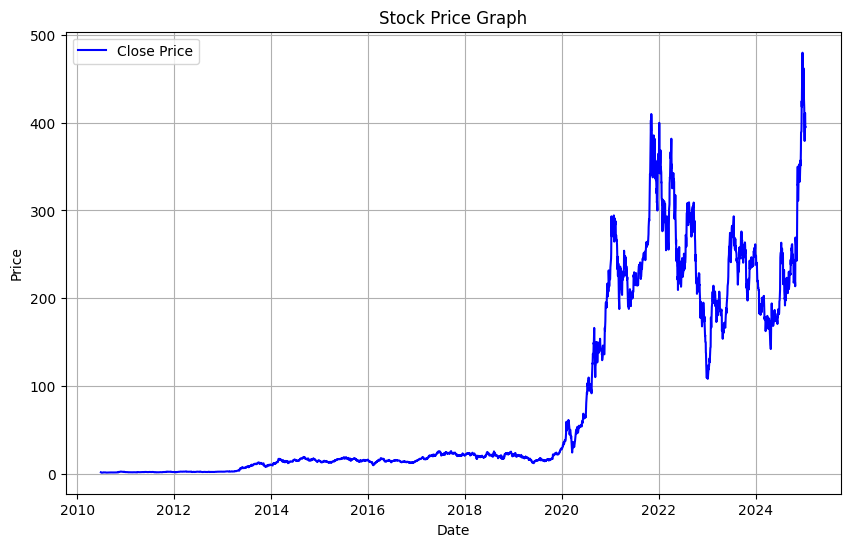

In [45]:
import yfinance as yf
import matplotlib.pyplot as plt

tesla_data = yf.download('TSLA')

tesla_data.reset_index(inplace=True)

def make_graph(data, title='Stock Price Graph'):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='b')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(tesla_data)

[*********************100%***********************]  1 of 1 completed


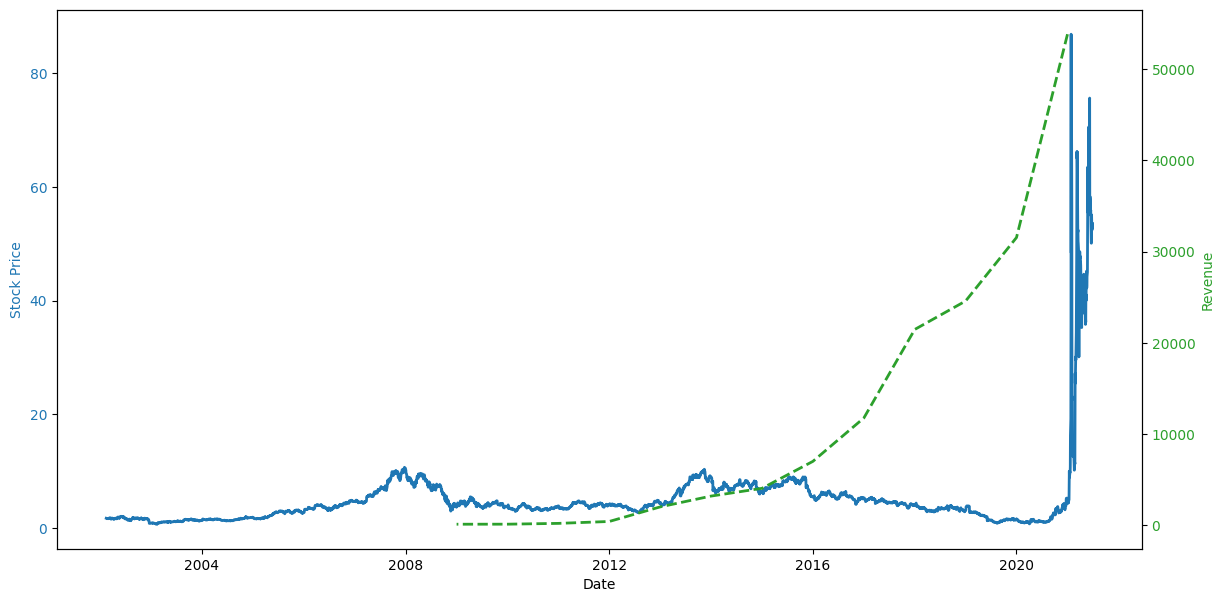

In [44]:
gme_data = yf.download('GME')
gme_data.reset_index(inplace=True)

gme_data = gme_data[gme_data['Date'] <= '2021-06-30']

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.content
soup = BeautifulSoup(html_data, "html5lib")
table = soup.find('table')

data = []
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    data.append([col.text.strip().replace(',', '').replace('$', '') for col in cols])

gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

def make_graph(stock_data, revenue_data, company):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color=color)
    ax1.plot(stock_data['Date'], stock_data['Close'], linewidth=2, label=f'{company} Stock Price', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Revenue', color=color)
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), linewidth=2, linestyle='--', label=f'{company} Revenue', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.show()

make_graph(gme_data, gme_revenue, 'GameStop')